# **Handwritten Digits Recognition Using Convolutional Neural Network.**

---





## **Some Details of the dataset we'll use for this model:**
The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset.The dataset contains 60,000 small square 28x28 pixel grayscaleimages of handwritten digits between 0 and 9. The task is to classify a given image of a handwritten digit into one of classes representing integer values from 0 to 9, inclusively.

## **What is Handwritten Digit Recognition?**
The handwritten digit recognition is the ability of computers to recognize human handwritten digits. It is a hard task for the machine because handwritten digits are not perfect and can be made with many different flavors. The handwritten digit recognition is the solution to this problem which uses the image of a digit and recognizes the digit present in the image. As the machine get trained on various types of handwritten digits images.

# **1.) IMPORTING LIBRARIES**

In [75]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential 
from sklearn.model_selection import KFold

# **2.) Loading the MNIST dataset directly from the keras.datasets**

In [76]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# **3.) Checking the shape of the images for training and testing the model.**

In [77]:
x_train.shape

(60000, 28, 28)

In [78]:
x_test.shape

(10000, 28, 28)

In [79]:
y_train.shape

(60000,)

In [80]:
y_test.shape

(10000,)

* From the above outputs, We can observe that the training dataset contains 60,000 samples and testing dataset contains 10,000 samples.

# **4.) Visualizing the first 20 training samples of handwritten digits between 0 to 9**

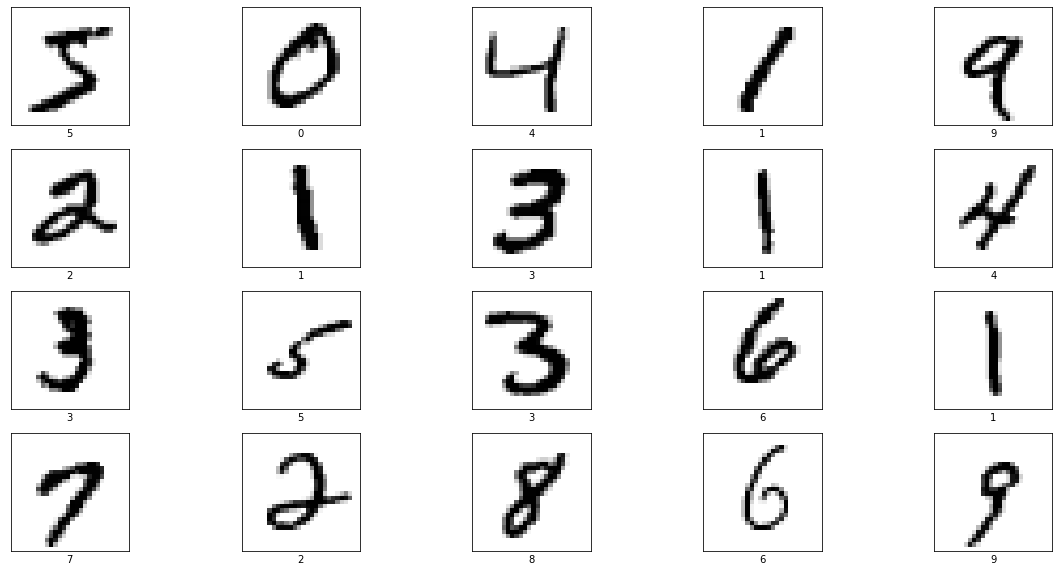

In [81]:
plt.figure(figsize=(20,10))
for i in range(0,20):
  plt.subplot(4,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i],cmap=plt.cm.binary)
  plt.xlabel(y_train[i])
plt.show()

# **5.) Data - Preprocessing**
The images cannot be fed directly into the model so we need to perform some operations and process the data. The dimension of the training data is (60000,28,28) as we observed above. The CNN model will require one more dimension so we reshape the matrix to shape (60000,28,28,1).

In [82]:
num_of_classes = 10

### **a.) Reshape the images to a single channel**
As we seen above the images are grayscale. Therefore, we reshape the data arrays to have a single color channel.

In [83]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test= x_test.reshape((x_test.shape[0], 28, 28, 1))

### **b.) Convert class vectors to binary class matrices**
We also know that there are 10 classes for 0 to 9 digits and that classes are represented as unique integers.
We can, therefore, use a one hot encoding for the class element of each sample, transforming the integer into a 10 element binary vector with a 1 for the index of the class value. We can achieve this with the to_categorical() utility function.

In [84]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

### **c.) Convert from integers to floats and scale the images to range 0-1**
We know that the pixel values for each image in the dataset are unsigned integers in the range between 0 and 255.
We do scaling as 255 is a big number as and it took more computational time while training the model. So we just scale the pixel values between 0 and 1 so that it take less computational time.
First converting the data type from integers to floats, then dividing the pixel values by the maximum value.

In [85]:
x_train = x_train.astype('float32')
x_test= x_test.astype('float32')
	
x_train = x_train / 255.0
x_test = x_test / 255.0	

# **6.) CNN Model Creation**
A CNN model generally consists of convolutional and pooling layers. It works better for data that are represented as grid structures, this is the reason why CNN works well for image classification problems. The dropout layer is used to deactivate some of the neurons and while training, it reduces offer fitting of the model. 

In [86]:
digit_recogonizer_model = Sequential(
    [
        keras.Input(shape = (28,28,1)),
        
        layers.Conv2D(32, kernel_size=(3, 3), padding="same",activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        
        layers.Flatten(),
        layers.Dropout(0.5),
        
        layers.Dense(num_of_classes, activation="softmax"),
    ])

In [87]:
digit_recogonizer_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 2, 2, 128)       

# **7.) Fitting the model**
The dataset already has a well-defined train and test dataset that we can use.

In order to estimate the performance of a model for a given training run, we can further split the training set into a train and validation dataset. 

The Keras API supports this by specifying the “validation_data” argument to the model.fit() function when training the model.

# **What is h5 file?**
H5 is a file format to store structured data, it's not a model by itself. Keras saves models in this format as it can easily store the weights and model configuration in a single file.


In [88]:
digit_recogonizer_model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
history = digit_recogonizer_model.fit(x_train, y_train,batch_size=32,epochs=30,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")
digit_recogonizer_model.save('mnist.h5')
print("Model has been successfully saved!")

Epoch 1/30
1875/1875 [==============================] - 73s 39ms/step - loss: 0.2095 - accuracy: 0.9341 - val_loss: 0.0508 - val_accuracy: 0.9842
Epoch 2/30
1875/1875 [==============================] - 72s 39ms/step - loss: 0.0689 - accuracy: 0.9787 - val_loss: 0.0328 - val_accuracy: 0.9899
Epoch 3/30
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0531 - accuracy: 0.9838 - val_loss: 0.0308 - val_accuracy: 0.9895
Epoch 4/30
1875/1875 [==============================] - 76s 40ms/step - loss: 0.0444 - accuracy: 0.9862 - val_loss: 0.0264 - val_accuracy: 0.9903
Epoch 5/30
1875/1875 [==============================] - 98s 52ms/step - loss: 0.0358 - accuracy: 0.9887 - val_loss: 0.0214 - val_accuracy: 0.9930
Epoch 6/30
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0313 - accuracy: 0.9901 - val_loss: 0.0256 - val_accuracy: 0.9913
Epoch 7/30
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0286 - accuracy: 0.9902 - val_loss: 0.0227 -

# **8.) Displaying curves of loss and accuracy during training.**

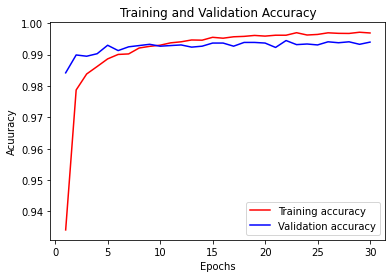

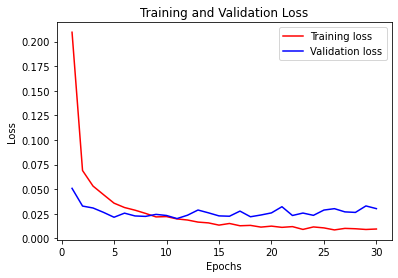

In [89]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1,len(accuracy)+1)

plt.plot(epochs,accuracy,"r",label = "Training accuracy")
plt.plot(epochs,val_accuracy,"b",label="Validation accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Acuuracy")
plt.legend()
plt.figure()
plt.plot(epochs,loss,"r",label = "Training loss")
plt.plot(epochs,val_loss,"b",label = "Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# **9.) Model Evaluation on training data:**

In [90]:
score = digit_recogonizer_model.evaluate(x_train, y_train, verbose=0)
print("Training loss:", score[0])
print("Training accuracy:", score[1])

Training loss: 0.0009059311123564839
Training accuracy: 0.9997333288192749


# **10.) Evaluation on testing data:**

In [91]:
score = digit_recogonizer_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03016958385705948
Test accuracy: 0.9940000176429749


# **11.) Predictions made by the model:**

The numpy. argmax() function returns indices of the max element of the array in a particular axis.


In [92]:
classes_y_test = np.argmax(y_test, axis=1)
y_predict = digit_recogonizer_model.predict(x_test) 
classes_y_predict = np.argmax(y_predict,axis=1)

In [93]:
print('label -> ',classes_y_test[19])
print('prediction -> ',classes_y_predict[19])

label ->  4
prediction ->  4


In [94]:
print('label -> ',classes_y_test[3001])
print('prediction -> ',classes_y_predict[3001])

label ->  9
prediction ->  9


# **12.) KFold Cross-Validation**
In order to estimate the performance of a model on the problem in general, we can use k-fold cross-validation, perhaps 5-fold cross-validation. This will give some account of the model’s variance with both respect to differences in the training and testing datasets.

The performance of a model can be taken as the mean performance across k-folds, given with the standard deviation, that could be used to estimate a confidence interval if desired.

We can use the KFold class from the scikit-learn API to implement the k-fold cross-validation evaluation of a given neural network model. we are following the approach where the KFold is only used to specify the row indexes used for each split.

In [95]:
def evaluate_model(X,Y,n_folds=5):

     scores,histories = [],[]
     kfold = KFold(n_folds,shuffle=True,random_state=1)
     for train_ix,test_ix in kfold.split(X):
         x_train,y_train,x_test,y_test = X[train_ix],Y[train_ix],X[test_ix],Y[test_ix]
         history = digit_recogonizer_model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_test,y_test),verbose=0)
         _, acc_score_model1= digit_recogonizer_model.evaluate(x_test,y_test,verbose=0)
         print('> %.3f' % (acc_score_model1 * 100.0))
         scores.append(acc_score_model1)
         histories.append(history)
     return scores,histories
scores , histories = evaluate_model(x_train,y_train) 


> 99.867
> 99.933
> 99.908
> 99.950
> 99.983


In [96]:
print('Accuracy: mean=%.3f std=%.3f, n=%d' % (np.mean(scores)*100, np.std(scores)*100, len(scores)))

Accuracy: mean=99.928 std=0.039, n=5


* Here, we can observe that the standard deviation is less than the 5% which is good.

In [97]:
digit_recogonizer_model.save('final_model.h5')

# **13.) Confusion Matrix of final model to check the true predictionsmade by the model for each class from 0 to 9**

In [103]:
from keras.models import load_model
model = load_model('final_model.h5')

In [104]:
classes_Ytest2 = np.argmax(y_test, axis=1)
Ypredict2 = model.predict(x_test) 
classes_Ypredict2 = np.argmax(Ypredict2,axis=1)

In [105]:
from sklearn import metrics
conf_matrix = metrics.confusion_matrix(classes_Ytest2,classes_Ypredict2)

In [106]:
def confusion_matrix(confusion_matrix, class_names, figsize = (20,10), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the outputted figure,
        the second determining the vertical size. 
    fontsize: int
        Font size for axes labels. Defaults to 14.
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

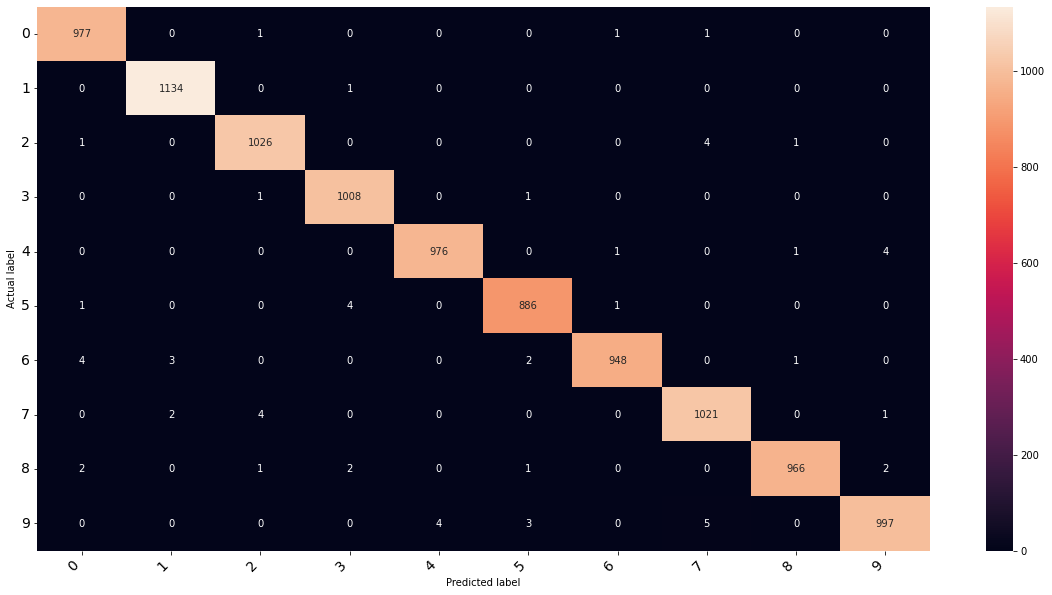

In [107]:
class_names= range(0,10)
confusion_matrix(conf_matrix, class_names, fontsize=14)

# **14.) Classification Report**

In [108]:
class_report = metrics.classification_report(classes_Ytest2,classes_Ypredict2)
print(class_report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      1.00      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



* From **Classification report**, we can observe that the f1-score for each class is good for 1 and 3 it is giving 100% and for others its 99%.
* And from the above **Confusion matrix**, we can notice the True predictions and false predictions made by the model for each class. 
* And by comparing the " **Support** column values in classification report
which is giving the count of samples/images for each label" and the true predictions made by the model and measure the distance between these counts gives you the best understanding of false predictions made by the model for particular class label.
* Just like for **"0" class label** its total count is 980 and the model predicted truly positive counts of 977 so 3 false predictions made by the model for **class "0"**.

# **15.) Testing the model on a new sample image**

In [154]:
import tensorflow
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [110]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **a.) Making prediction on the follwing digit "1" image:**

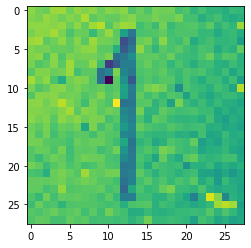

In [152]:
img_path = "/content/one.jpg"
img = image.load_img(img_path,color_mode="grayscale",target_size=(28,28))
plt.imshow(img)
plt.show()

In [153]:
img = img_to_array(img)
	# reshape into a single sample with 1 channel
img = img.reshape(1, 28, 28, 1)
	# prepare pixel data
img = img.astype('float32')
img = img / 255.0
model = load_model('final_model.h5')
	# predict the class
result = (model.predict(img) > 0.5).astype("int32")
print(result[0])


[0 1 0 0 0 0 0 0 0 0]


* for understanding the labels just remind the very basics of python. We all know that the python array,list's index values starts from 0.
* And here, we're just reading the array.
* 1 indicates the class label predicted by the model.
* And just check read the index value of 1 it is placed on index number "1" which is a class label 1 and the input sample image we pass into the model is also of digit "1" so we can say that the model we designed predicted the class right for this sample image. 
* We can observe the index value [1] indicates 1 so the model is making true prediction for digit "1".


## **b.) Making prediction on the follwing digit "0" image:** 

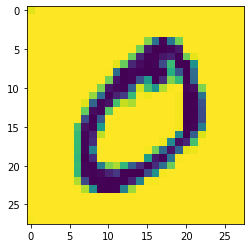

In [140]:
img_path2 = "/content/zero.jpg"
img2 = image.load_img(img_path2,color_mode="grayscale",target_size=(28,28))
plt.imshow(img2)
plt.show()

In [141]:
img2 = img_to_array(img2)
	# reshape into a single sample with 1 channel
img2 = img2.reshape(1, 28, 28, 1)
	# prepare pixel data
img2 = img2.astype('float32')
img2 = img2 / 255.0
model = load_model('final_model.h5')
	# predict the class
result = (model.predict(img2) > 0.5).astype("int32")
print(result[0])

[1 0 0 0 0 0 0 0 0 0]


* We can observe the index value [0] indicates 1 so the model is making true prediction for digit "0".

## **c.) Making prediction on the follwing digit "3" image:**

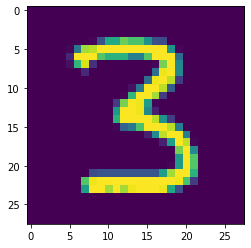

In [142]:
img_path3 = "/content/three.jpg"
img3 = image.load_img(img_path3,color_mode="grayscale",target_size=(28,28))
plt.imshow(img3)
plt.show()

In [143]:
img3 = img_to_array(img3)
	# reshape into a single sample with 1 channel
img3 = img3.reshape(1, 28, 28, 1)
	# prepare pixel data
img3 = img3.astype('float32')
img3 = img3 / 255.0
model = load_model('final_model.h5')
	# predict the class
result = (model.predict(img3) > 0.5).astype("int32")
print(result[0])

[0 0 0 1 0 0 0 0 0 0]


* We can observe the index value [4] indicates 1 so the model is making true prediction for digit "3".

## **d.) Making prediction on the follwing digit "7" image:**

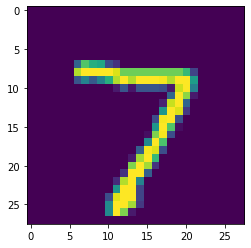

In [147]:
img_path4 = "/content/7.jpg"
img4 = image.load_img(img_path4,color_mode="grayscale",target_size=(28,28))
plt.imshow(img4)
plt.show()

In [148]:
img4 = img_to_array(img4)
	# reshape into a single sample with 1 channel
img4 = img4.reshape(1, 28, 28, 1)
	# prepare pixel data
img4 = img4.astype('float32')
img4 = img4 / 255.0
model = load_model('final_model.h5')
	# predict the class
result = (model.predict(img4) > 0.5).astype("int32")
print(result[0])

[0 0 0 0 0 0 0 1 0 0]


* We can observe the index value [8] indicates 1 so the model is making true prediction for digit "7".

# **e.) Making prediction on the follwing digit "5" image:**

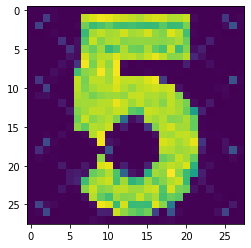

In [149]:
img_path5 = "/content/five.jpg"
img5 = image.load_img(img_path5,color_mode="grayscale",target_size=(28,28))
plt.imshow(img5)
plt.show()

In [150]:
img5 = img_to_array(img5)
	# reshape into a single sample with 1 channel
img5 = img5.reshape(1, 28, 28, 1)
	# prepare pixel data
img5 = img5.astype('float32')
img5 = img5 / 255.0
model = load_model('final_model.h5')
	# predict the class
result = (model.predict(img5) > 0.5).astype("int32")
print(result[0])

[0 0 0 0 0 1 0 0 0 0]


* We can observe the index value [6] indicates 1 so the model is making true prediction for digit "5".

# **So, At last, After observing all the true predictions made by the model for new sample images. We can say that the model we designed here is working well for digit recogonition task. Hence, Handwritten-Digit recogonition task accomplished successfully.**